In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import math as math
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from shapely.affinity import rotate, translate


# Question 1

In [2]:
def buffon(disc_diameters):
    num_tosses=4444444
    line_spacing=1

    results = {}
    
    # loop through each disk diameter stated in problem
    for diameter in disc_diameters:
        radius = diameter / 2
        line_crossings = {}

        # keep track of 5 lines
        #cross_counts = np.zeros(10)
        cross_counts = {i: 0 for i in range(5)}
        
        # monte carlo loop
        for _ in range(num_tosses):
            # randomly place the center of the disk based on the line space size
            center_y = np.random.random() * line_spacing
            
            # dtermine how far the disk reaches 
            lower_extent = center_y - radius
            upper_extent = center_y + radius
            
            # count to keep track of how many lines are crossed
            lines_crossed = 0
            
            # check lower line
            if lower_extent <= 0:
                lines_crossed += 1
                
            # check top ine
            if upper_extent >= line_spacing:
                lines_crossed += 1
                
            # check any other lines above 
            line_pos = 2 * line_spacing
            while upper_extent >= line_pos:
                lines_crossed += 1
                line_pos += line_spacing
                
            # check lines below
            line_pos = -line_spacing
            while lower_extent <= line_pos:
                lines_crossed += 1
                line_pos -= line_spacing
                
            # increment count in dict for the cross lines count 
            cross_counts[lines_crossed] += 1

        # get rid of all 0 entries, meaning a cross never happened, if not 0, then divide by # of tosses to get probabilities
        for key in list(cross_counts.keys()):
            if cross_counts[key] == 0:
                cross_counts.pop(key)
            else:
                cross_counts[key] /= num_tosses
                
        results[diameter] = cross_counts
        
    return results

In [3]:
# init disc_diameters
disc_diameters = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.5, 2.0, 3.0]

buffon_results = buffon(disc_diameters)

In [4]:
# print probabilities
for d, dic in buffon_results.items():
    print("---------------------------------------------------")
    print(f"d = {d}")
    for line_cross_count, prob in dic.items():
        if prob != 0:
            print(f"P({line_cross_count} lines) = {prob}")

---------------------------------------------------
d = 0.1
P(0 lines) = 0.899983889998389
P(1 lines) = 0.100016110001611
---------------------------------------------------
d = 0.2
P(0 lines) = 0.799928629992863
P(1 lines) = 0.200071370007137
---------------------------------------------------
d = 0.3
P(0 lines) = 0.6999073449907345
P(1 lines) = 0.3000926550092655
---------------------------------------------------
d = 0.4
P(0 lines) = 0.6001931850193185
P(1 lines) = 0.3998068149806815
---------------------------------------------------
d = 0.5
P(0 lines) = 0.499916749991675
P(1 lines) = 0.500083250008325
---------------------------------------------------
d = 0.6
P(0 lines) = 0.400403740040374
P(1 lines) = 0.599596259959626
---------------------------------------------------
d = 0.7
P(0 lines) = 0.3002137050213705
P(1 lines) = 0.6997862949786295
---------------------------------------------------
d = 0.8
P(0 lines) = 0.199974169997417
P(1 lines) = 0.800025830002583
------------------

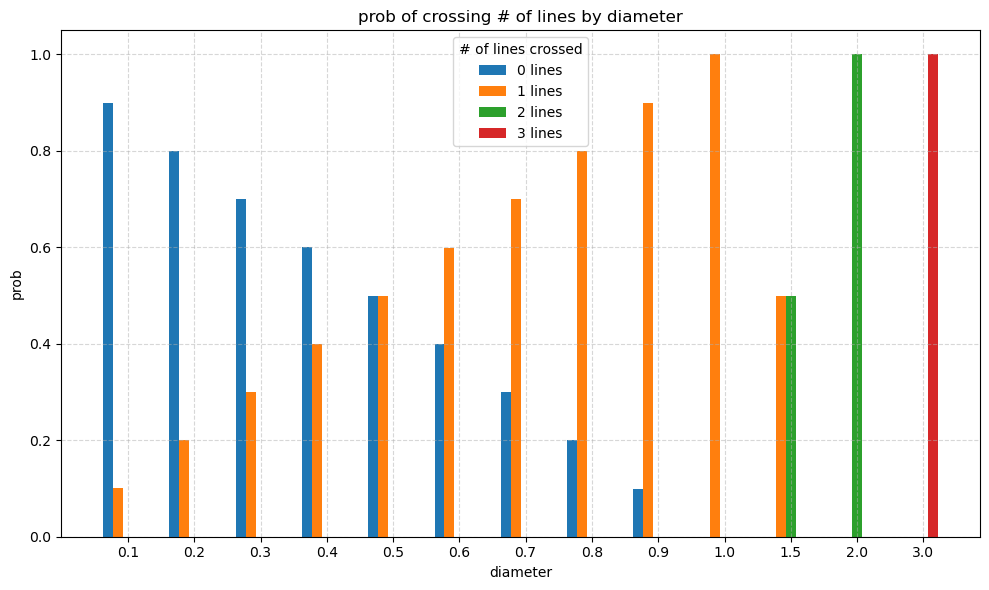

In [5]:

diameters = buffon_results.keys()
all_cross_counts = sorted({k for dic in buffon_results.values() for k in dic})

# set x axis
x = np.arange(len(diameters))

# plot
plt.figure(figsize=(10, 6))

# plot each # of lines crossed as diff bars
for i, count in enumerate(all_cross_counts):
    probs = [buffon_results[d].get(count, 0) for d in diameters]
    plt.bar(x + i * 0.15, probs, width=0.15, label=f'{count} lines')

# plot stuff
plt.xlabel('diameter')
plt.ylabel('prob')
plt.title('prob of crossing # of lines by diameter')
plt.xticks(x + 0.15 * len(all_cross_counts) / 2, diameters)
plt.legend(title='# of lines crossed')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# Question 2:

In [6]:
# generate rose
def generate_rose_curve(num_points=1000):
    theta = np.linspace(0, 2 * np.pi, num_points)
    r = np.sin(2 * theta)
    x = r * np.cos(theta)
    y = r * np.sin(theta)

    # zip function into polygons
    rose_poly = Polygon(zip(x, y))
    # was getting error and this was fixing it, making sure it is a valid polygon
    if not rose_poly.is_valid:
        rose_poly = rose_poly.buffer(0)
    return rose_poly, x, y

# create the rectangle to cut -- check rotations
def create_cut(x_center, y_center, angle_deg, width=1.0, height=np.sqrt(2)):
    half_w, half_h = width / 2, height / 2
    rect = Polygon([(-half_w, -half_h), (half_w, -half_h), (half_w, half_h), (-half_w, half_h)])
    rect = rotate(rect, angle_deg, origin=(0, 0), use_radians=False)
    rect = translate(rect, xoff=x_center, yoff=y_center)
    return rect

# compute intersection area
def compute_intersection_area(rose, cutter):
    try:
        inter = rose.intersection(cutter)
        return inter.area
    except:
        return 0.0

# generate a grid area for the calculations
def generate_area_grid(rose, x_range, y_range, angle_deg):
    #init grid
    area_grid = np.zeros((len(y_range), len(x_range)))
    # store results
    results = []

    #loop through grid
    for i, y in enumerate(y_range):
        for j, x in enumerate(x_range):
            # create cut
            cutter = create_cut(x, y, angle_deg)
            # compute area of cut and rose
            try:
                area = compute_intersection_area(rose, cutter)
            except:
                area = 0
            # store area
            area_grid[i, j] = area
            #append results
            results.append((x, y, angle_deg, area))
    
    return area_grid, results



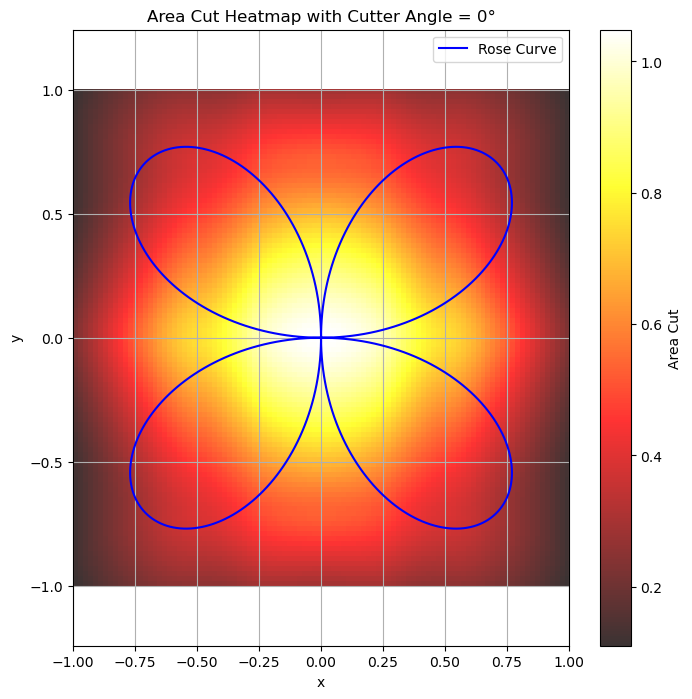

Best Cut at x=-0.010, y=0.010, angle=0° with area=1.0483


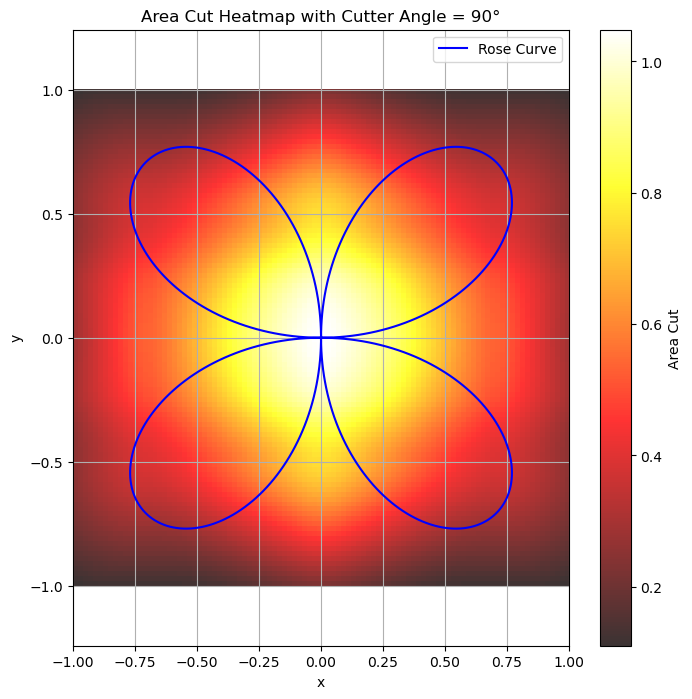

Best Cut at x=-0.010, y=-0.010, angle=90° with area=1.0483


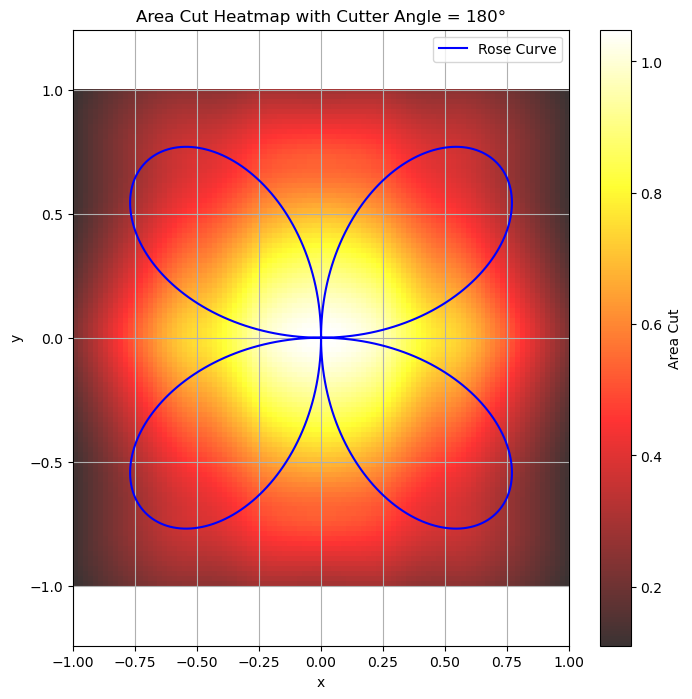

Best Cut at x=-0.010, y=0.010, angle=180° with area=1.0483


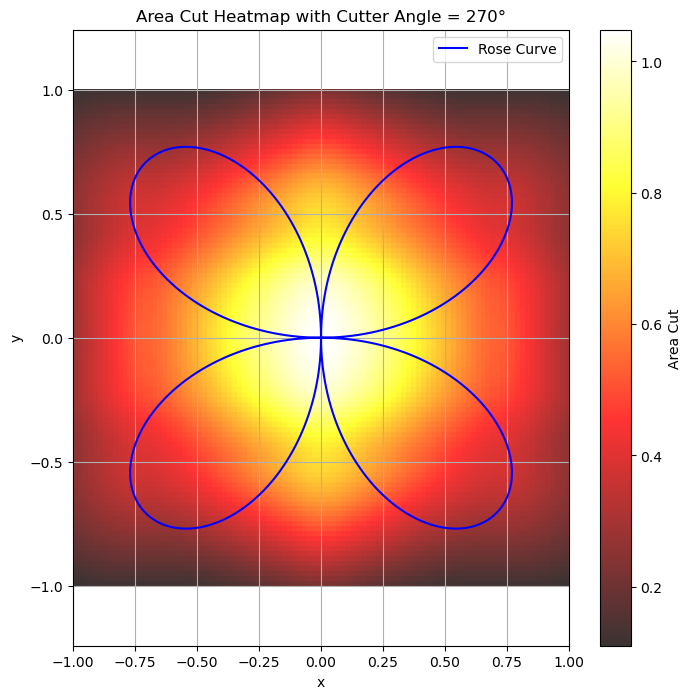

Best Cut at x=-0.010, y=-0.010, angle=270° with area=1.0483


In [7]:
angle_deg_list = [0, 90, 180, 270]

# loop through the diff angle list for testing
for angle_deg in angle_deg_list:

    rose, rose_x, rose_y = generate_rose_curve()
    x_vals = np.linspace(-1, 1, 100)
    y_vals = np.linspace(-1, 1, 100)

    area_grid, results = generate_area_grid(rose, x_vals, y_vals, angle_deg)

    # plot
    plt.figure(figsize=(8, 8))
    extent = [x_vals[0], x_vals[-1], y_vals[0], y_vals[-1]]
    plt.imshow(area_grid, extent=extent, origin='lower', cmap='hot', alpha=0.8)

    # plot rose curve on top
    plt.plot(rose_x, rose_y, color='blue', linewidth=1.5, label='Rose Curve')
    plt.colorbar(label='Area Cut')
    plt.title(f'Area Cut Heatmap with Cutter Angle = {angle_deg}°')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.show()

    # print best results
    best = max(results, key=lambda x: x[3])
    print(f"Best Cut at x={best[0]:.3f}, y={best[1]:.3f}, angle={best[2]}° with area={best[3]:.4f}")

# Question 3

/var/folders/rh/bp1_zwxj76z6nrtwmrl525600000gn/T/ipykernel_74310/977576451.py:13: RuntimeWarning: divide by zero encountered in scalar divide
  return (y + alpha * r) / x


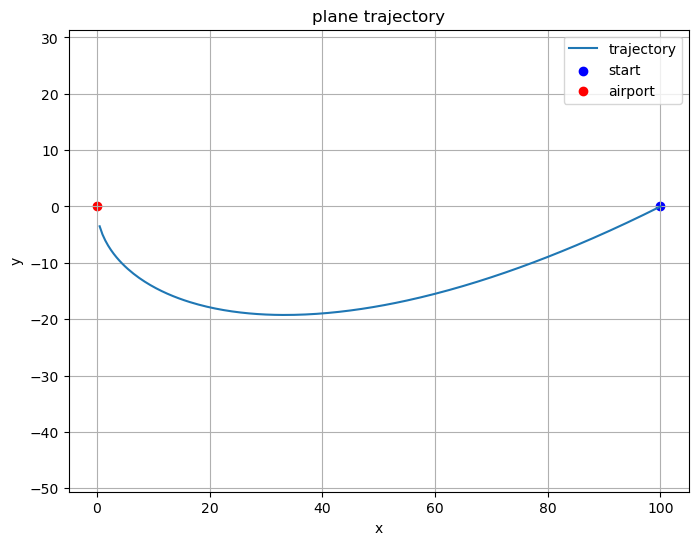

In [8]:
# init parameters given in the problem
x0 = 100
y0 = 0
v = 44
vp = 88
alpha = v / vp
h = -0.5
n_steps = int(abs(x0 / h))

# diff equation: dy/dx = (y + 0.5 * sqrt(x^2 + y^2)) / x
def dydx(x, y):
    r = np.sqrt(x**2 + y**2)
    return (y + alpha * r) / x

# range kutta 
x_vals = [x0]
y_vals = [y0]

x, y = x0, y0
# repeat for steps
for _ in range(n_steps):
    # calc each part of the kutta, k1, k2, k3, k4
    k1 = h * dydx(x, y)
    k2 = h * dydx(x + h/2, y + k1/2)
    k3 = h * dydx(x + h/2, y + k2/2)
    k4 = h * dydx(x + h, y + k3)
    
    # get weighted avg
    y += (k1 + 2*k2 + 2*k3 + k4) / 6
    x += h

    # store new values
    x_vals.append(x)
    y_vals.append(y)

# plot trajectory
plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, label="trajectory")
plt.scatter([x0], [y0], color='blue', label='start')
plt.scatter([0], [0], color='red', label='airport')
plt.xlabel("x")
plt.ylabel("y")
plt.title("plane trajectory")
plt.grid(True)
plt.legend()
plt.axis('equal')
plt.show()
